## Import Dataset


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

diabetes_df = pd.read_csv("datasets/diabetes_clean.csv")
print(diabetes_df.shape)
diabetes_df.head()

(768, 9)


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Train/ Test Split


In [2]:
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fit the model


In [3]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/youssef/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predict the Positive Probilities passing test features


In [4]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[0.06785722 0.78997463 0.76346209 0.3386966  0.70810765 0.04240082
 0.35969108 0.44200007 0.20243132 0.78627064 0.12969435 0.5246359
 0.04596105 0.09929712 0.07168876 0.11412325 0.07196556 0.04775242
 0.1715817  0.08868728 0.38033983 0.44697687 0.03373649 0.57446936
 0.20477619 0.73834881 0.26268653 0.99675555 0.04889211 0.17677208
 0.63890494 0.37773802 0.66682748 0.05007315 0.13488808 0.89145805
 0.42272947 0.49049261 0.54288303 0.41985406 0.27812781 0.15112077
 0.08283239 0.26743785 0.07056428 0.09579795 0.49014056 0.71722409
 0.10760728 0.01798713 0.04462195 0.87816258 0.55330311 0.36377786
 0.14142024 0.02215029 0.19476535 0.32690057 0.49130228 0.67320915
 0.80491384 0.67524197 0.02239562 0.14928498 0.43528442 0.05941323
 0.09514471 0.19259493 0.24965042 0.61451709 0.44316745 0.93058815
 0.68098827 0.14511453 0.12983706 0.45935202 0.15125627 0.87400466
 0.19096259 0.50918607 0.29838533 0.47440992 0.6959882  0.86144599
 0.52383335 0.51719408 0.87250985 0.47012148 0.39869696 0.39295

## Make Predictions

You can see the predictions made by this model by calling the `predict` function.


In [5]:
y_pred = logreg.predict(X_test)
print(y_pred)

combined = np.column_stack((y_pred_prob, y_pred))
print(combined)

[0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0]
[[0.06785722 0.        ]
 [0.78997463 1.        ]
 [0.76346209 1.        ]
 [0.3386966  0.        ]
 [0.70810765 1.        ]
 [0.04240082 0.        ]
 [0.35969108 0.        ]
 [0.44200007 0.        ]
 [0.20243132 0.        ]
 [0.78627064 1.        ]
 [0.12969435 0.        ]
 [0.5246359  1.        ]
 [0.04596105 0.        ]
 [0.09929712 0.        ]
 [0.07168876 0.        ]
 [0.11412325 0.        ]
 [0.07196556 0.        ]
 [0.04775242 0.        ]
 [0.1715817  0.        ]
 [0.08868728 0.        ]
 [0.38033983 0.        ]
 [0.44697687 0.        ]
 [0.03373649 0.        ]
 [0.57446936 1.        ]
 [0.20477619 0.        ]
 [0.73834881 1.        ]
 [0.26268653 0.        ]
 [0.9967555

## Calculate accuracy

You can calculate this accuracy of this model by calling the `score` function.


In [6]:
print("Accuracy on training set:", logreg.score(X_test, y_test))

Accuracy on training set: 0.7922077922077922


## ROC (receiver operating characteristic)

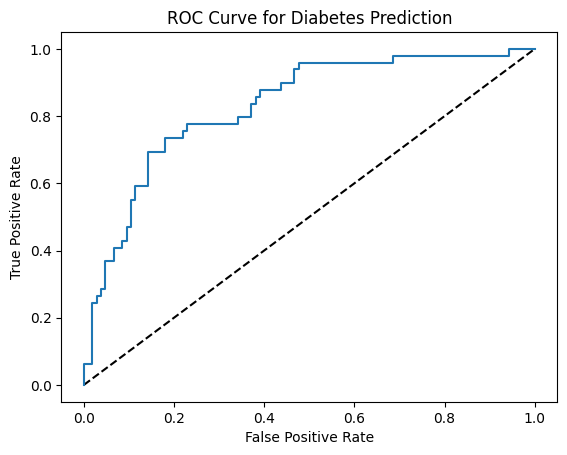

In [7]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

## AUC (area under the curve)

In [8]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8297376093294461
[[93 12]
 [20 29]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.71      0.59      0.64        49

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



## Regularization
- Make predictions less sensitive to training data
- **Smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function** <br>
`model = LogisticRegression(C=0.1)` <br>
`model = LogisticRegression(C=100)`
#### Hyperparameters affecting Regularization are `penalty` & `C` 
- `penalty` is the type of regularization `l1` or `l2` <br>
`l1` => Lasso <br>
`l2` => Ridge <br>
- `C` is the inverse Regularization strenght

## Multiclass Logistic Regression 

In [11]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class="ovr")
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.7719869706840391
OVR test accuracy    : 0.7922077922077922
Softmax training accuracy: 0.7736156351791531
Softmax test accuracy    : 0.7857142857142857
